In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_gme=pd.read_csv("GME_stock.csv")
df_spy=pd.read_csv("SPY.csv")

In [3]:
df_gme.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [4]:
df_spy.head()

,Date,Open,High,Low,Close,Volume,Dividends
0,2024-12-30 00:00:00-05:00,587.890015,587.979980,584.409973,586.250000,13201830,0.0
1,2024-12-27 00:00:00-05:00,597.539978,597.780029,590.760010,595.010010,64847900,0.0
2,2024-12-26 00:00:00-05:00,599.500000,602.479980,598.080017,601.340027,41219100,0.0
3,2024-12-24 00:00:00-05:00,596.059998,601.340027,595.469971,601.299988,33160100,0.0
4,2024-12-23 00:00:00-05:00,590.890015,595.299988,587.659973,594.690002,57635800,0.0


In [5]:
df_gme.shape

(4773, 7)

In [6]:
df_spy.shape

(8037, 7)

In [7]:
df_gme.isnull().sum()

date              0
open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

In [8]:
df_spy.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Dividends    0
dtype: int64

In [9]:
df_gme["date"]=pd.to_datetime(df_gme["date"] ,utc=True)
df_gme=df_gme.sort_values("date").dropna()

df_spy["Date"]=pd.to_datetime(df_spy["Date"] ,utc=True)
df_spy=df_spy.sort_values("Date").dropna()


In [12]:
df_gme["GME_Daily_Return"]= df_gme["close_price"].pct_change()
df_spy["SPY_Daily_Return"]=df_spy["Close"].pct_change()

In [27]:
# Remove timezone info to match dates properly
df_gme['date'] = df_gme['date'].dt.tz_localize(None)
df_spy['Date'] = df_spy['Date'].dt.tz_localize(None)

print("GME date range:", df_gme['date'].min(), "to", df_gme['date'].max())
print("SPY date range:", df_spy['Date'].min(), "to", df_spy['Date'].max())

# Merge on date only (ignore time)
df_gme['date_only'] = df_gme['date'].dt.date
df_spy['date_only'] = df_spy['Date'].dt.date

merged = pd.merge(df_gme, df_spy, on='date_only', how='inner')
print(f"Merged dataset size: {len(merged)}")

if len(merged) > 0:
    print("GME returns NaN count:", merged['GME_Daily_Return'].isna().sum())
    print("SPY returns NaN count:", merged['SPY_Daily_Return'].isna().sum())
    
    merged = merged.dropna()
    print(f"After dropping NaN: {len(merged)}")
    
    correlation = merged['GME_Daily_Return'].corr(merged['SPY_Daily_Return'])
    print(f"Correlation: {correlation}")
else:
    correlation = 0
    print("No common dates found - setting correlation to 0")

GME date range: 2002-02-13 00:00:00 to 2021-01-28 00:00:00
SPY date range: 1993-01-29 05:00:00 to 2024-12-30 05:00:00
Merged dataset size: 4773
GME returns NaN count: 1
SPY returns NaN count: 0
After dropping NaN: 4772
Correlation: 0.2861276732918401


In [28]:
merged.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,GME_Daily_Return,date_only,Date,Open,High,Low,Close,Volume,Dividends,SPY_Daily_Return
1,2002-02-14,10.175,10.195,9.925,10.000,2755400.0,6.733003,-0.004975,2002-02-14,2002-02-14 05:00:00,73.387766,73.687813,72.787667,73.094238,20453800,0.0,-0.001870
2,2002-02-15,10.000,10.025,9.850,9.950,2097400.0,6.699336,-0.005000,2002-02-15,2002-02-15 05:00:00,73.152972,73.211675,72.213690,72.331100,18366800,0.0,-0.010440
3,2002-02-19,9.900,9.900,9.375,9.550,1852600.0,6.430017,-0.040201,2002-02-19,2002-02-19 05:00:00,71.848400,71.939719,70.843892,70.941734,15988100,0.0,-0.019208
4,2002-02-20,9.600,9.875,9.525,9.875,1723200.0,6.648838,0.034031,2002-02-20,2002-02-20 05:00:00,71.130910,72.135414,70.328606,72.135414,29242800,0.0,0.016826
5,2002-02-21,9.840,9.925,9.750,9.850,1744200.0,6.632006,-0.002532,2002-02-21,2002-02-21 05:00:00,71.704943,72.161536,70.615640,70.641731,26288600,0.0,-0.020707


In [18]:
correlation=merged["GME_Daily_Return"].corr(merged["SPY_Daily_Return"])

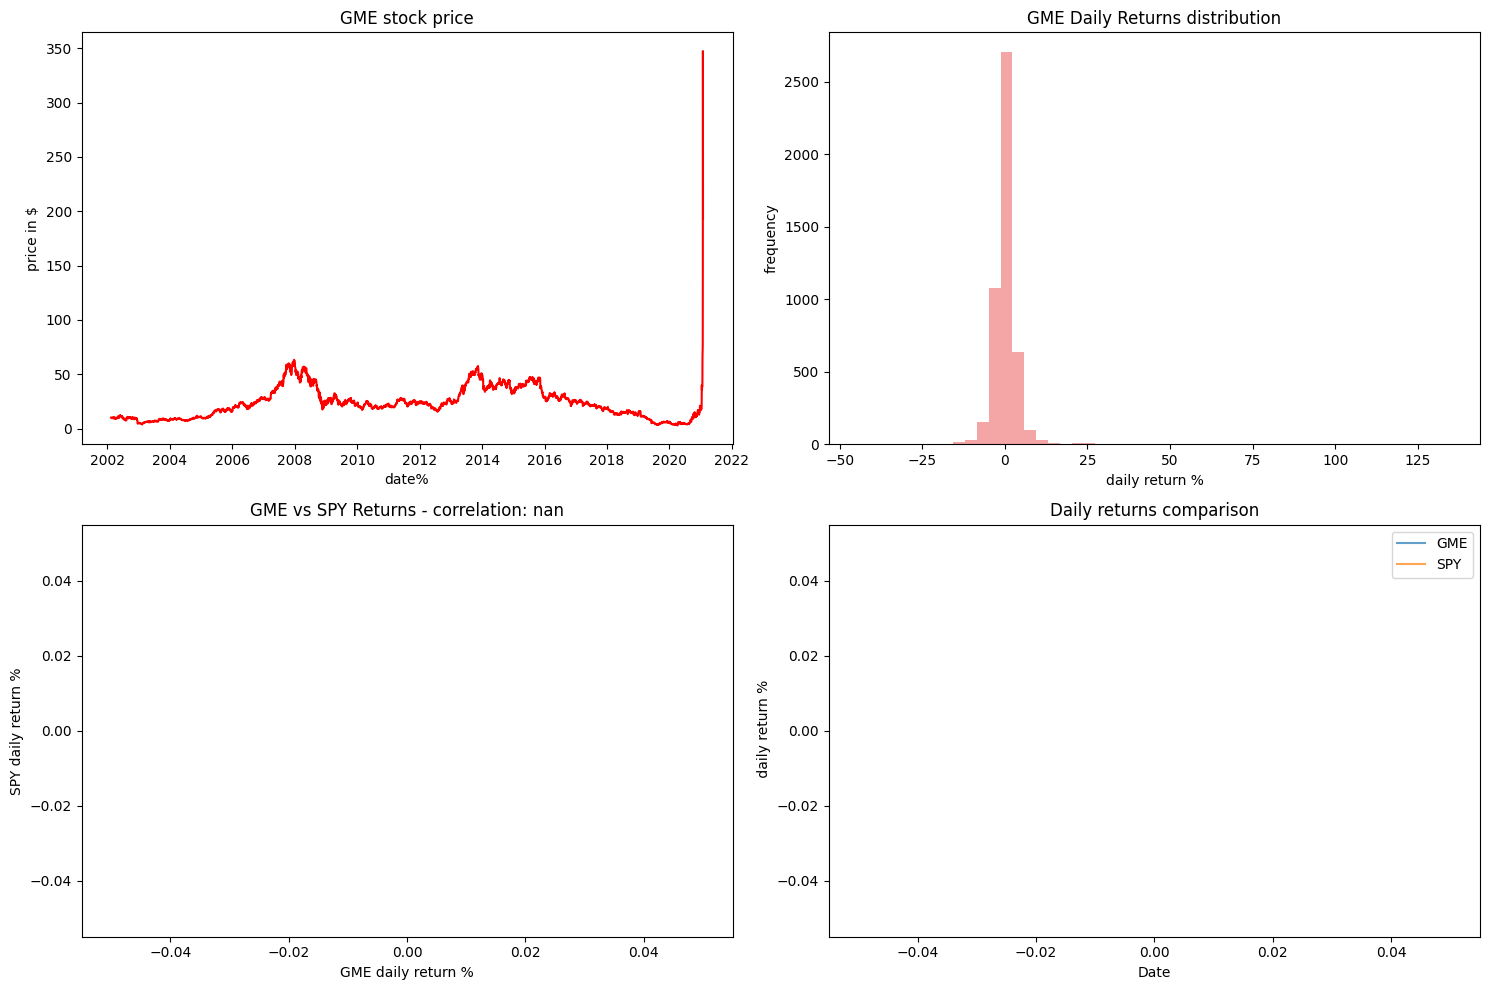

In [20]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(df_gme["date"],df_gme["close_price"],color="red")
plt.title("GME stock price")
plt.xlabel("date%")
plt.ylabel("price in $")
plt.grid=(True)

plt.subplot(2,2,2)
plt.hist(df_gme["GME_Daily_Return"].dropna() *100,bins=50,alpha=0.7,color="lightcoral")
plt.title("GME Daily Returns distribution")
plt.xlabel("daily return %")
plt.ylabel("frequency")
plt.grid=(True)

plt.subplot(2,2,3)
plt.scatter(merged["GME_Daily_Return"] *100,merged["SPY_Daily_Return"] *100,alpha=0.5)
plt.title(f'GME vs SPY Returns - correlation: {correlation:.3f}')
plt.xlabel("GME daily return %")
plt.ylabel("SPY daily return %")
plt.grid=(True)

plt.subplot(2,2,4)
plt.plot(merged["date"],merged["GME_Daily_Return"] *100,label="GME",alpha=0.7)
plt.plot(merged["date"],merged["SPY_Daily_Return"] *100,label="SPY",alpha=0.7)
plt.title("Daily returns comparison")
plt.xlabel("Date")
plt.ylabel(" daily return %")
plt.legend()
plt.grid=(True)

plt.tight_layout()
plt.show()

In [24]:
mean_close=df_gme["close_price"].mean()
median_close=df_gme["close_price"].median()
std_close=df_gme["close_price"].std()

print("=== required statistics ===")
print(f"Mean Closing  Price: ${mean_close:.2f}")
print(f"Median Closing  Price: ${median_close:.2f}")
print(f"Standard Deviation Price: ${std_close:.2f}")
print(f"Correlation with s&p 500 : ${correlation:.3f}")

=== required statistics ===
Mean Closing  Price: $23.19
Median Closing  Price: $21.76
Standard Deviation Price: $14.51
Correlation with s&p 500 : $nan
